In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer CSV
df = pd.read_csv("resultados_energia_limpio.csv")

# Renombrar columnas
df = df.rename(columns={
    "tiempo_s(segundos)": "tiempo_s",
    "energia_j(julios)": "energia_j"
})
df

,timestamp,script,iteracion,tiempo_s,energia_j
0,2025-09-08T17:32:23-05:00,Flotantes_precision_simple.jl,1,0.478407,18.624510
1,2025-09-08T17:32:23-05:00,Flotantes_precision_simple.jl,2,0.438614,22.294913
2,2025-09-08T17:32:23-05:00,Flotantes_precision_simple.jl,3,0.440255,22.670794
3,2025-09-08T17:32:24-05:00,Flotantes_precision_simple.jl,4,0.440434,22.514110
4,2025-09-08T17:32:24-05:00,Flotantes_precision_simple.jl,5,0.439000,22.470395
...,...,...,...,...,...
2495,2025-09-08T17:56:34-05:00,Flotantes_precision_doble.jl,496,0.564050,26.770878
2496,2025-09-08T17:56:35-05:00,Flotantes_precision_doble.jl,497,0.563931,26.459737
2497,2025-09-08T17:56:35-05:00,Flotantes_precision_doble.jl,498,0.562609,26.511965
2498,2025-09-08T17:56:36-05:00,Flotantes_precision_doble.jl,499,0.562547,26.371455


In [9]:

# Filtrar scripts
scripts_filtrados = ["Precision_simple.jl", "Precision_doble.jl", "Flotantes_precision_simple.jl", "Flotantes_precision_doble.jl"]
df = df[df["script"].isin(scripts_filtrados)]


# Función para quitar outliers
def remove_outliers_iqr(df, columnas):
    df_clean = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Limpiar outliers
df_clean = remove_outliers_iqr(df, ["tiempo_s", "energia_j"])

# Calcular estadísticas
df_stats = df_clean.groupby("script")[["tiempo_s", "energia_j"]].agg(['mean', 'var']).reset_index()
df_stats.columns = ['script', 'tiempo_promedio', 'tiempo_varianza', 'energia_promedio', 'energia_varianza']

# Orden deseado
scripts_filtrados = [
    "Precision_simple.jl",
    "Precision_doble.jl",
    "Flotantes_precision_simple.jl",
    "Flotantes_precision_doble.jl"
]

# Asegurar orden en df_stats
df_stats["script"] = pd.Categorical(df_stats["script"], categories=scripts_filtrados, ordered=True)
df_stats = df_stats.sort_values("script")



In [10]:
print(df_stats["script"])


3              Precision_simple.jl
2               Precision_doble.jl
1    Flotantes_precision_simple.jl
0     Flotantes_precision_doble.jl
Name: script, dtype: category
Categories (4, object): ['Precision_simple.jl' < 'Precision_doble.jl' < 'Flotantes_precision_simple.jl' < 'Flotantes_precision_doble.jl']


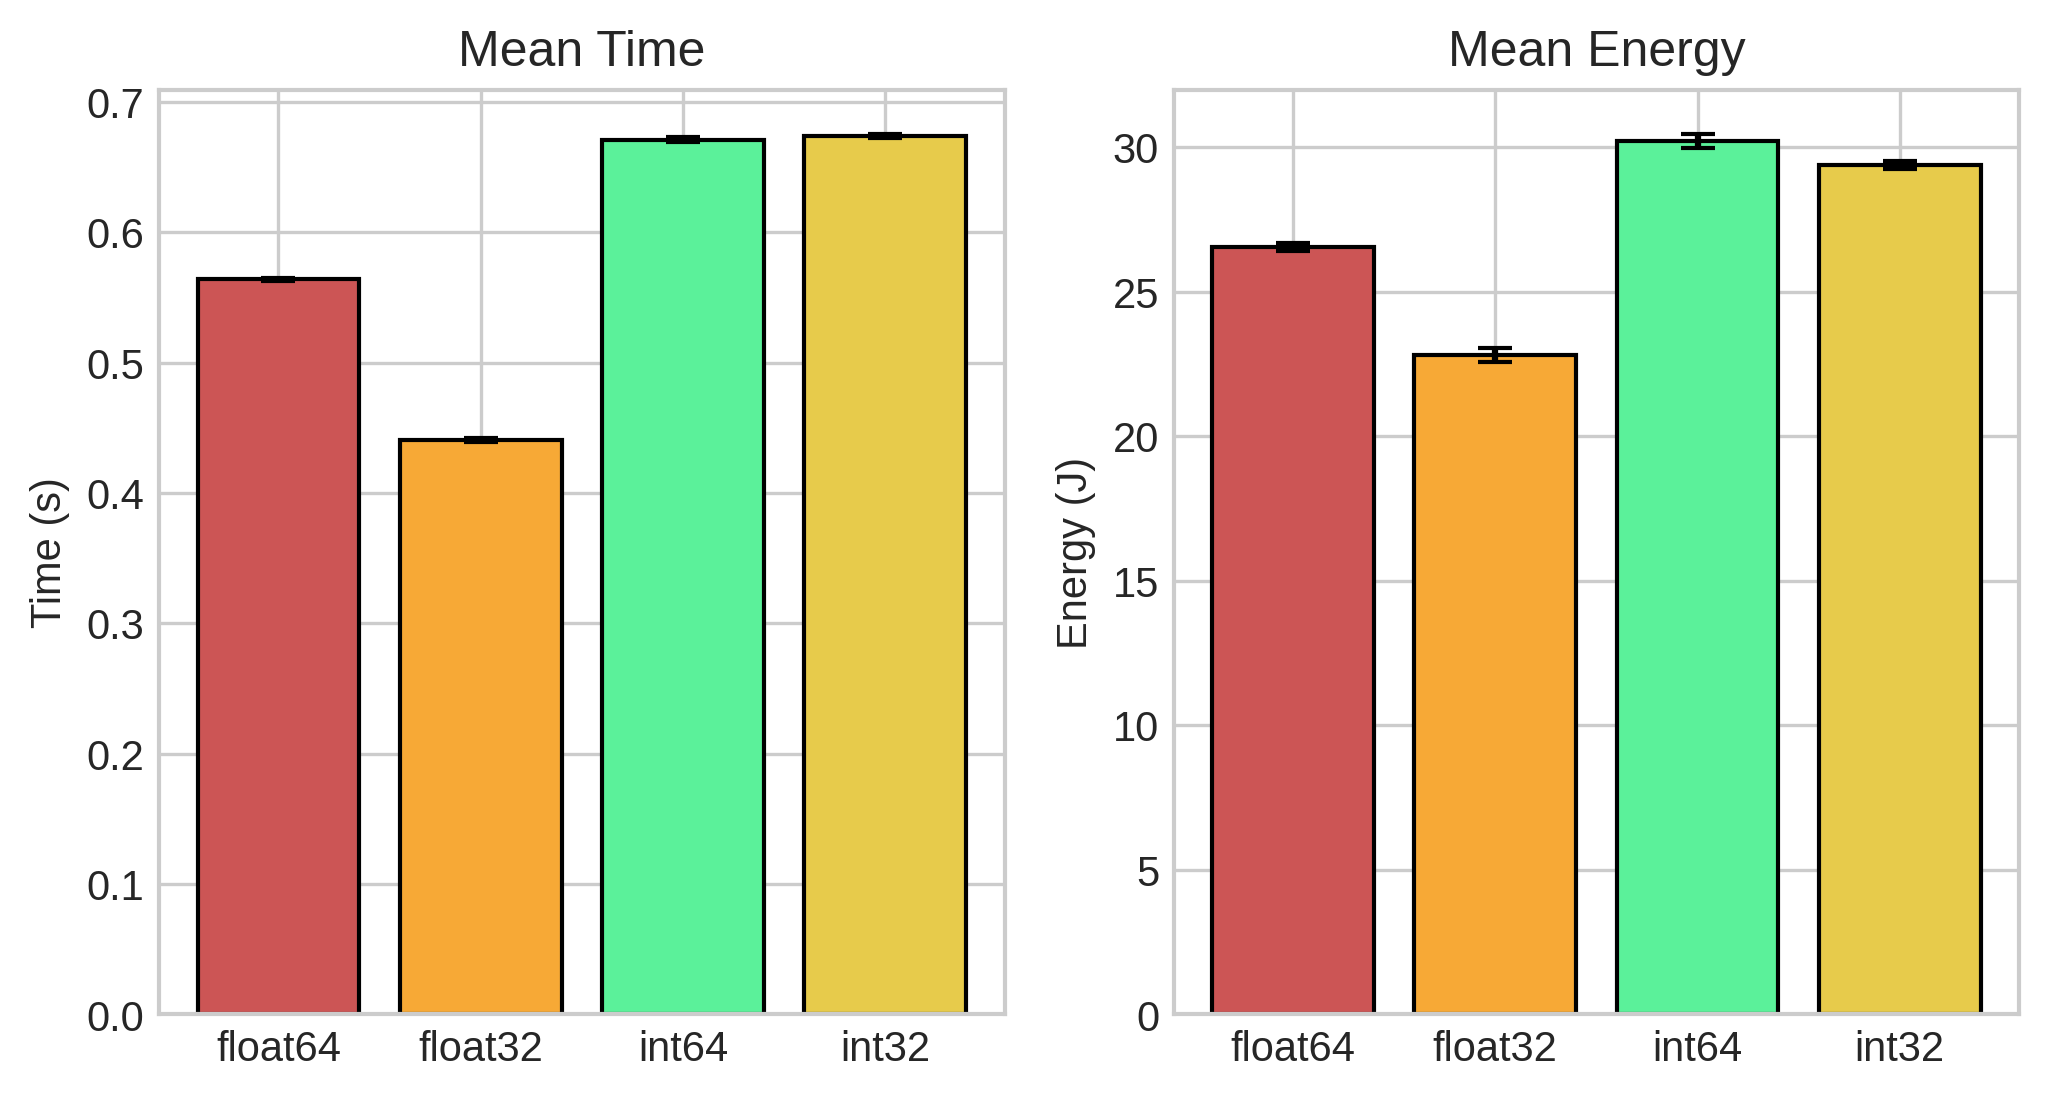

In [14]:

# Función para quitar outliers
def remove_outliers_iqr(df, columnas):
    df_clean = df.copy()
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

# Limpiar outliers
df_clean = remove_outliers_iqr(df, ["tiempo_s", "energia_j"])

# Calcular estadísticas
df_stats = df_clean.groupby("script")[["tiempo_s", "energia_j"]].agg(['mean', 'var']).reset_index()
df_stats.columns = ['script', 'tiempo_promedio', 'tiempo_varianza', 'energia_promedio', 'energia_varianza']

# --- Visualización estilo paper ---
fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi=300)

# Colores sobrios (grises)
colors = ["#cc5555", "#f7a936", "#5bf19a","#e7cb4b"]

mapeo = {
    "Precision_simple.jl": "int32",
    "Precision_doble.jl": "int64",
    "Flotantes_precision_simple.jl": "float32",
    "Flotantes_precision_doble.jl": "float64"
}

# Tiempo promedio
axes[0].bar(
    df_stats["script"], df_stats["tiempo_promedio"],
    yerr=df_stats["tiempo_varianza"]**0.5,
    color=colors, capsize=4, edgecolor="black"
)
axes[0].set_ylabel("Time (s)")
axes[0].set_xticks(range(len(df_stats)))
axes[0].set_xticklabels([mapeo[s] for s in df_stats["script"]])
axes[0].set_title("Mean Time")

# Energía promedio
axes[1].bar(
    df_stats["script"], df_stats["energia_promedio"],
    yerr=df_stats["energia_varianza"]**0.5,
    color=colors, capsize=4, edgecolor="black"
)
axes[1].set_ylabel("Energy (J)")
axes[1].set_xticks(range(len(df_stats)))
axes[1].set_xticklabels([mapeo[s] for s in df_stats["script"]])
axes[1].set_title("Mean Energy")


# Ajustar diseño

# Guardar en formato de alta calidad
plt.savefig("comparacion_precision.pdf", bbox_inches="tight")
plt.savefig("comparacion_precision.png", dpi=300, bbox_inches="tight")

plt.show()
